In [118]:
##task 2##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

dataset = np.loadtxt('test-Minimum-Error-Rate-Classifier.txt',delimiter=",",dtype='float64')

mean_1=np.array([0,0])
mean_2=np.array([2,2])
cov_1=np.array([ [.25,.3], [.3,1] ])
cov_2=np.array([ [.5,0], [0,.5] ])
prior_1=0.5
prior_2=0.5



def normal_distribution(x, mu, sigma):  
    D = len(mu)   
    
    a1 = (2 * np.pi)**D         # (2pie)^D
    a2 = np.linalg.det(sigma)   # |cov|
    a3 = 1.0 / np.sqrt(a1 * a2)  

    a4 = np.transpose(x - mu)  #(x-mu)^T
    a5 = np.linalg.inv(sigma)  # covariance^-1
    a6 = (x - mu)              # (x-mu)
    a7=np.dot(a4,a5)
    a8 = -0.5 * (np.dot(a7,a6))           

    a = a3 * np.exp(a8)  


    return a 




In [119]:
X_1=[]
Y_1=[]
X_2=[]
Y_2=[]
print("Output 1:\n")
for i in  dataset:
    x= np.array([i[0],i[1]])
    likelyhood_1 = normal_distribution(x,mean_1 , cov_1)
    likelyhood_2 = normal_distribution(x,mean_2 , cov_2)
    posterior_1= likelyhood_1* prior_1 
    posterior_2= likelyhood_2* prior_2 
    print(x, end =' ')
    if( posterior_1> posterior_2):
        print("class 1") 
        X_1.append(x[0])
        Y_1.append(x[1])
    else:
        print("class 2")
        X_2.append(x[0])
        Y_2.append(x[1])


Output 1:

[1. 1.] class 1
[ 1. -1.] class 1
[4. 5.] class 2
[-2.   2.5] class 2
[0. 2.] class 1
[ 2. -3.] class 2


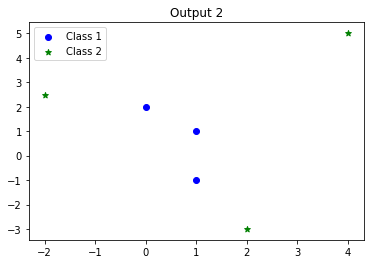

In [120]:
##task 2##

fig,ax=plt.subplots()
plt.title("Output 2")
ax.scatter(X_1, Y_1, marker='o',color='b',label='Class 1')
ax.scatter(X_2, Y_2, marker='*',color='g',label='Class 2')
ax.legend()

In [121]:
##task3##

# 2-dimensional distribution will be over variables X and Y


X = np.linspace(-4, 4, 30)
Y = np.linspace(-5, 5,30)

X,Y = np.meshgrid(X,Y) # (vector to matrix)

data = np.empty(X.shape + (2,)) # X Y into a single 3D array
print(pos.shape)
data[:, :, 0] = X
data[:, :, 1] = Y

def Distribution_3D(data, mu, cov):
    D = mu.shape[0]
    a1 = np.linalg.det(cov)
    a2 = np.linalg.inv(cov)
    a3 = np.sqrt((2*np.pi)**D * a1)
    a4= np.einsum('...a,ab,...b->...', data-mu, a2, data-mu) 
    a5= -0.5*a4
    a6 = np.exp(a5) 
    a7 =a6/ a3
    return a7

Z = Distribution_3D(data, mu1, cov1)
Z1 = Distribution_3D(data, mu2, cov2)


(30, 30, 2)


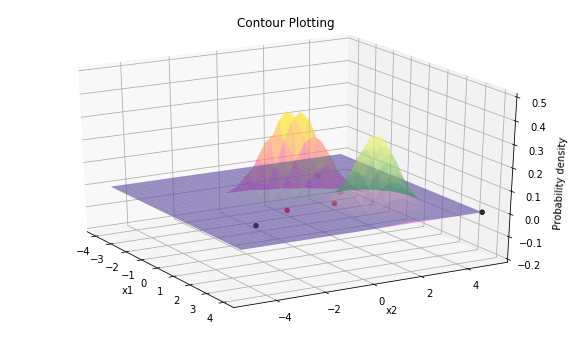

In [122]:
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')

fig.set_figheight(6)
fig.set_figwidth(10)
ax.scatter(X_1, Y_1, 0,color='red')
ax.scatter(X_2, Y_2, 0,color='black')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=1, antialiased=True,cmap=cm.spring,alpha=.4)
ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, linewidth=1, antialiased=True,cmap=cm.summer,alpha=.4)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Probability density')
ax.set_title('Contour Plotting')

ax.set_zlim(-0.2,0.3)
ax.set_zticks(np.linspace(-0.2,0.5,8))
ax.view_init(25, -30)
plt.show()




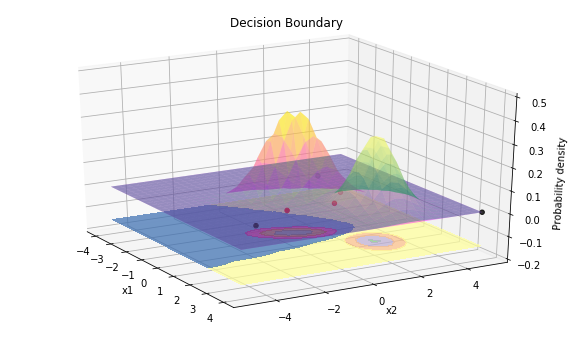

In [123]:
## task - 4
fig = plt.figure()
ax = fig.gca(projection='3d')

fig.set_figheight(6)
fig.set_figwidth(10)
ax.scatter(X_1, Y_1, 0,color='red')
ax.scatter(X_2, Y_2, 0,color='black')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=1, antialiased=True,cmap=cm.spring,alpha=.4)
ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, linewidth=1, antialiased=True,cmap=cm.summer,alpha=.4)

db=Z-Z1 #decision boundary
ax.contourf(X, Y, db, zdir='z', offset=-0.15, cmap=cm.Accent,alpha=0.7)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Probability density')
ax.set_title('Decision Boundary')
ax.set_zlim(-0.2,0.3)
ax.set_zticks(np.linspace(0.5,-0.2,8))
ax.view_init(25, -30)
plt.show()

